#Importing libraries


In [ ]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K
import tensorflow as tf

#Initialising new resnet model

In [ ]:
new_input = Input(shape=(32, 32, 3))


model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=new_input,
    input_shape=None,
    pooling=None,
    classes=10,
    # **kwargs
)

flatten = Flatten()
new_layer2 = Dense(10, activation='softmax', name='my_dense_2')
inp = model.input
out = new_layer2(flatten(model.output))

model = Model(inp, out)
model.summary()
# model.add(layers.Dense(10))
# adding a linear layer of 10 inputs 

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

#Initilasing the train and test data for finetuning

In [ ]:
print(model)
from keras.datasets import cifar10
from keras.utils import to_categorical
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# convert from integers to floats
trainX1 = trainX.astype('float32')
testX1 = testX.astype('float32')
# normalize to range 0-1
trainX1 = trainX1 / 255.0
testX1 = testX1 / 255.0
trainY1 = to_categorical(trainY)
testY1 = to_categorical(testY)

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#Training model on CIFAR10

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(trainX1, trainY1, 
                    validation_data=(testX1, testY1),
                    epochs=2, 
                    batch_size=32,
                    verbose=1, 
                    )

Epoch 1/2
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4649 - accuracy: 0.5427 - val_loss: 1.3183 - val_accuracy: 0.5252
Epoch 2/2
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4282 - accuracy: 0.5452 - val_loss: 1.6387 - val_accuracy: 0.5073


# Display Activations

In [ ]:
from keras.models import Model
# print(model.layers)
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
# print(trainX1[10].shape)
activations = activation_model.predict(trainX1[5].reshape(1,32,32,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

(1, 16, 16, 64)


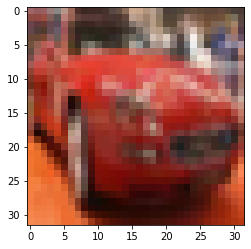

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(trainX1[5][:,:,:]);
print(activations[2].shape)
# print(len(activations))

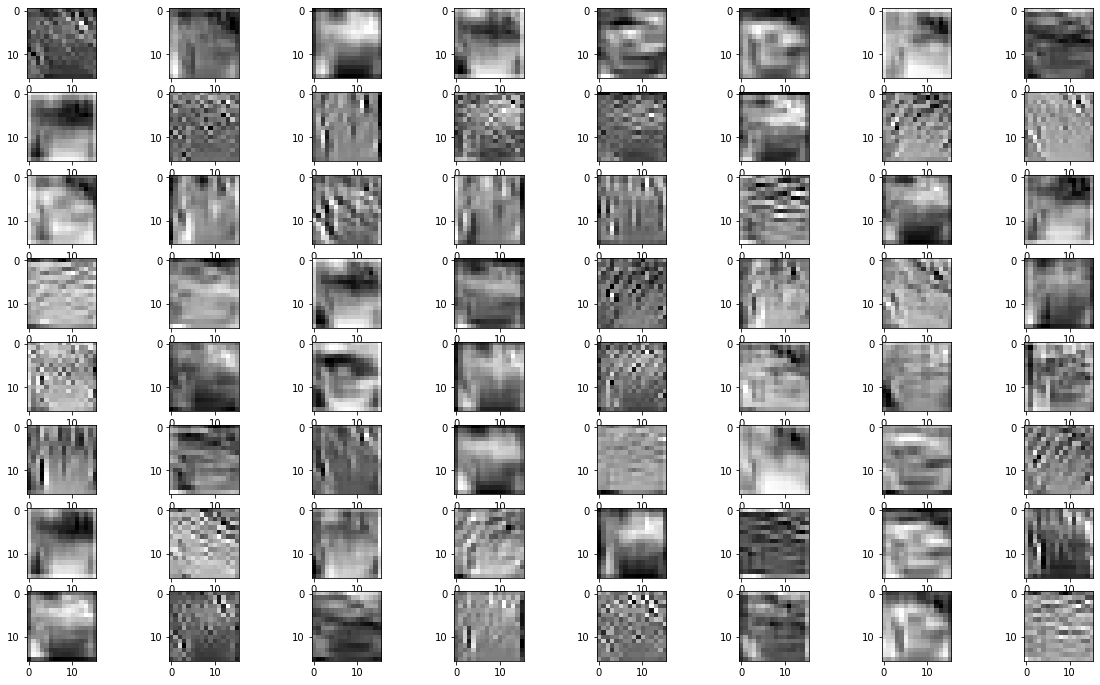

In [ ]:
display_activation(activations, 8, 8, 2)

#Acknowledgement
There are few parts of the assignment where we discussed some aspects with another group (Raghav Gupta and Prakhar Kanchan). This was on a collaborative level, such as sending some links to resources, PyTorch tutorials and some debugging tips. The collaboration was strictly limited to what is permitted in other EE and CSE dept. assignment courses. In no way have copied, cheated or violated the code of conduct.